In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches
from scipy.io import loadmat
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.text import Text
from matplotlib.legend_handler import HandlerLine2D

In [2]:
path_csv = os.path.abspath('../../../0_MOOSE_Input_Files/Heat_Sources/')

colormap_data = loadmat('../cold2hot.mat')
cold2hot = ListedColormap(colormap_data['colormap'])
hot2cold = ListedColormap(colormap_data['colormap'][::-1])

In [3]:
G_Tdb = pd.read_csv(path_csv+'/Gaussian/TDB/exodus/Au-Au.csv',     encoding='utf-8')
G_Fit = pd.read_csv(path_csv+'/Gaussian/Fitting/exodus/Au-Au.csv', encoding='utf-8')
F_Tdb = pd.read_csv(path_csv+'/FlatTop/TDB/exodus/Au-Au.csv',      encoding='utf-8')
F_Fit = pd.read_csv(path_csv+'/FlatTop/Fitting/exodus/Au-Au.csv',  encoding='utf-8')
R_Tdb = pd.read_csv(path_csv+'/Ring/TDB/exodus/Au-Au.csv',         encoding='utf-8')
R_Fit = pd.read_csv(path_csv+'/Ring/Fitting/exodus/Au-Au.csv',     encoding='utf-8')
B_Tdb = pd.read_csv(path_csv+'/Bessel/TDB/exodus/Au-Au.csv',       encoding='utf-8')
B_Fit = pd.read_csv(path_csv+'/Bessel/Fitting/exodus/Au-Au.csv',   encoding='utf-8')

# Peak Tempearture

In [4]:
G_Tdb_temp = G_Tdb['temp_max'][36:455]  # <--0.5s;  1.0s -->  [52:455]
G_Fit_temp = G_Fit['temp_max'][113:522] # <--0.5s;  1.0s -->  [121:522]

F_Tdb_temp = F_Tdb['temp_max'][45:470]  # <--0.5s;  1.0s -->  [62:470]
F_Fit_temp = F_Fit['temp_max'][111:520] # <--0.5s;  1.0s -->  [120:520]

R_Tdb_temp = R_Tdb['temp_max'][9:418]  # <--0.5s;  1.0s -->  [17:418]
R_Fit_temp = R_Fit['temp_max'][96:505] # <--0.5s;  1.0s -->  [104:505]

B_Tdb_temp = B_Tdb['temp_max'][49:477] # <--0.5s;  1.0s -->  [66:477]
B_Fit_temp = B_Fit['temp_max'][99:511] # <--0.5s;  1.0s -->  [107:511]

In [5]:
print(G_Tdb_temp.max(), G_Tdb_temp.min(), G_Tdb_temp.mean())
print(F_Tdb_temp.max(), F_Tdb_temp.min(), F_Tdb_temp.mean())
print(R_Tdb_temp.max(), R_Tdb_temp.min(), R_Tdb_temp.mean())
print(B_Tdb_temp.max(), B_Tdb_temp.min(), B_Tdb_temp.mean())
print('\n')
print(G_Fit_temp.max(), G_Fit_temp.min(), G_Fit_temp.mean())
print(F_Fit_temp.max(), F_Fit_temp.min(), F_Fit_temp.mean())
print(R_Fit_temp.max(), R_Fit_temp.min(), R_Fit_temp.mean())
print(B_Fit_temp.max(), B_Fit_temp.min(), B_Fit_temp.mean())

2996.3620882717 2767.7396532408 2879.5967601970037
2966.3785544921 2726.4764394838 2848.492660242821
2069.1063278564 1883.2816797826 1985.3932343299257
2680.176086209 2441.0271150596 2554.310687306177


3061.5847128814 2932.3347328228 2958.384555958302
3028.9293117876 2899.1567824377 2925.157560543797
2180.1315003589 1966.7518716581 2007.5188885139587
2748.9449040583 2612.8851932614 2641.108531768841


## Separation by Heat Sources

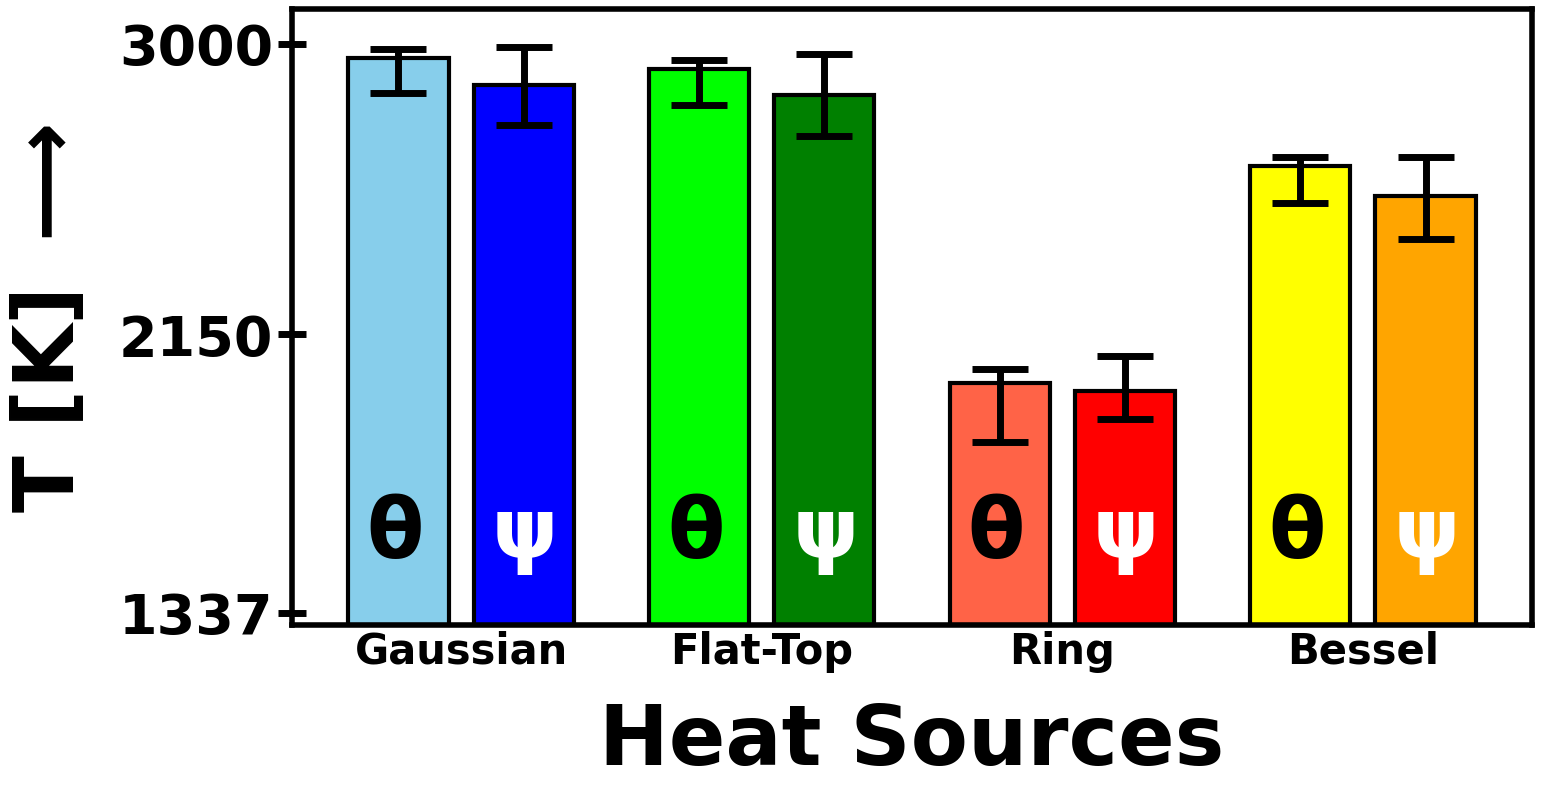

In [7]:
labels = [r'Gaussian $\mathbf{\psi}$', r'Gaussian $\theta$', r'FlatTop $\mathbf{\psi}$', r'FlatTop $\mathbf{\theta}$', r'Ring $\mathbf{\psi}$', r'Ring $\theta$', r'Bessel $\mathbf{\psi}$', r'Bessel $\mathbf{\theta}$']
means     = [G_Fit_temp.mean(), G_Tdb_temp.mean(), F_Fit_temp.mean(), F_Tdb_temp.mean(), R_Fit_temp.mean(),  R_Tdb_temp.mean(), B_Fit_temp.mean(),  B_Tdb_temp.mean()]
max_temps = [G_Fit_temp.max(), G_Tdb_temp.max(), F_Fit_temp.max(), F_Tdb_temp.max(), R_Fit_temp.max(),  R_Tdb_temp.max(), B_Fit_temp.max(),  B_Tdb_temp.max()]
min_temps = [G_Fit_temp.min(), G_Tdb_temp.min(), F_Fit_temp.min(), F_Tdb_temp.min(), R_Fit_temp.min(),  R_Tdb_temp.min(), B_Fit_temp.min(),  B_Tdb_temp.min()]

errors = [(max_temps[i] - means[i], means[i] - min_temps[i]) for i in range(len(means))]

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

bar_width = 2  # Width of each bar
gap = 0.5  # Gap between groups

# Position of Center of the Bars
P_GF = 1
P_GT = P_GF + bar_width/2 + gap + bar_width/2

P_FF = P_GT + bar_width/2 + 3*gap + bar_width/2
P_FT = P_FF + bar_width/2 + gap + bar_width/2

P_RF = P_FT + bar_width/2 + 3*gap + bar_width/2
P_RT = P_RF + bar_width/2 + gap + bar_width/2

P_BF = P_RT + bar_width/2 + 3*gap + bar_width/2
P_BT = P_BF + bar_width/2 + gap + bar_width/2

positions = [P_GF, P_GT, P_FF, P_FT, P_RF, P_RT, P_BF, P_BT]
colors = ['skyblue', 'blue', 'lime', 'green', 'tomato', 'red', 'yellow', 'orange']

# positions = [1, 14, 4, 17, 7, 20, 10, 23]
# colors = ['blue', 'green', 'skyblue', 'lime', 'red', 'orange', 'tomato', 'yellow']

bars = ax1.bar(positions, means, bar_width, yerr=np.array(errors).T, capsize=20, color=colors, linewidth=3, linestyle='-', edgecolor='k', error_kw={ 'elinewidth': 5, 'ecolor':'k', 'capthick':5, }, )

ax1.set_xticks([P_GF+bar_width/2+gap/2, P_FF+bar_width/2+gap/2, P_RF+bar_width/2+gap/2, P_BF+bar_width/2+gap/2,], labels=[r'Gaussian', r'Flat-Top', r'Ring', r'Bessel',], size=30, color='k', weight='bold')

ax1.tick_params(axis='x', direction='inout', which='both', length=0, width=0)
ax1.tick_params(axis='y', which='both', direction='inout', length=20, width=5)
ax1.set_yticks([1337, 2150, 3000], labels=['1337', '2150', '3000' ], size=40, color='k', weight='bold')
ax1.set_xlabel(r"Heat Sources", weight = 'bold', size=60, labelpad=20, color='k')
ax1.set_ylabel(r"T [K] $\mathbf{\longrightarrow}$", weight = 'bold', size=60, labelpad=20, color='k')
ax1.set_ylim(1300,3100)

ax1.set_ylim(1300,3100)
ax1.spines[:].set_linewidth(4)

ax1.text(x=P_GF-0.65, y=1500, s=r'$\mathbf{\theta}$', fontsize=60, weight='bold', color='k', rotation=0)
ax1.text(x=P_FF-0.65, y=1500, s=r'$\mathbf{\theta}$', fontsize=60, weight='bold', color='k', rotation=0)
ax1.text(x=P_RF-0.65, y=1500, s=r'$\mathbf{\theta}$', fontsize=60, weight='bold', color='k', rotation=0)
ax1.text(x=P_BF-0.65, y=1500, s=r'$\mathbf{\theta}$', fontsize=60, weight='bold', color='k', rotation=0)

ax1.text(x=P_GT-0.65, y=1500, s=r'$\mathbf{\psi}$',   fontsize=60, weight='bold', color='white', rotation=0)
ax1.text(x=P_FT-0.65, y=1500, s=r'$\mathbf{\psi}$',   fontsize=60, weight='bold', color='white', rotation=0)
ax1.text(x=P_RT-0.65, y=1500, s=r'$\mathbf{\psi}$',   fontsize=60, weight='bold', color='white', rotation=0)
ax1.text(x=P_BT-0.65, y=1500, s=r'$\mathbf{\psi}$',   fontsize=60, weight='bold', color='white', rotation=0)

# plt.savefig('../../figures/peak_temp_heat_sources.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/peak_temp_heat_sources.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/peak_temp_heat_sources.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/peak_temp_heat_sources.jpg',bbox_inches='tight',)
            
plt.show()

## Separation by Free energy functional

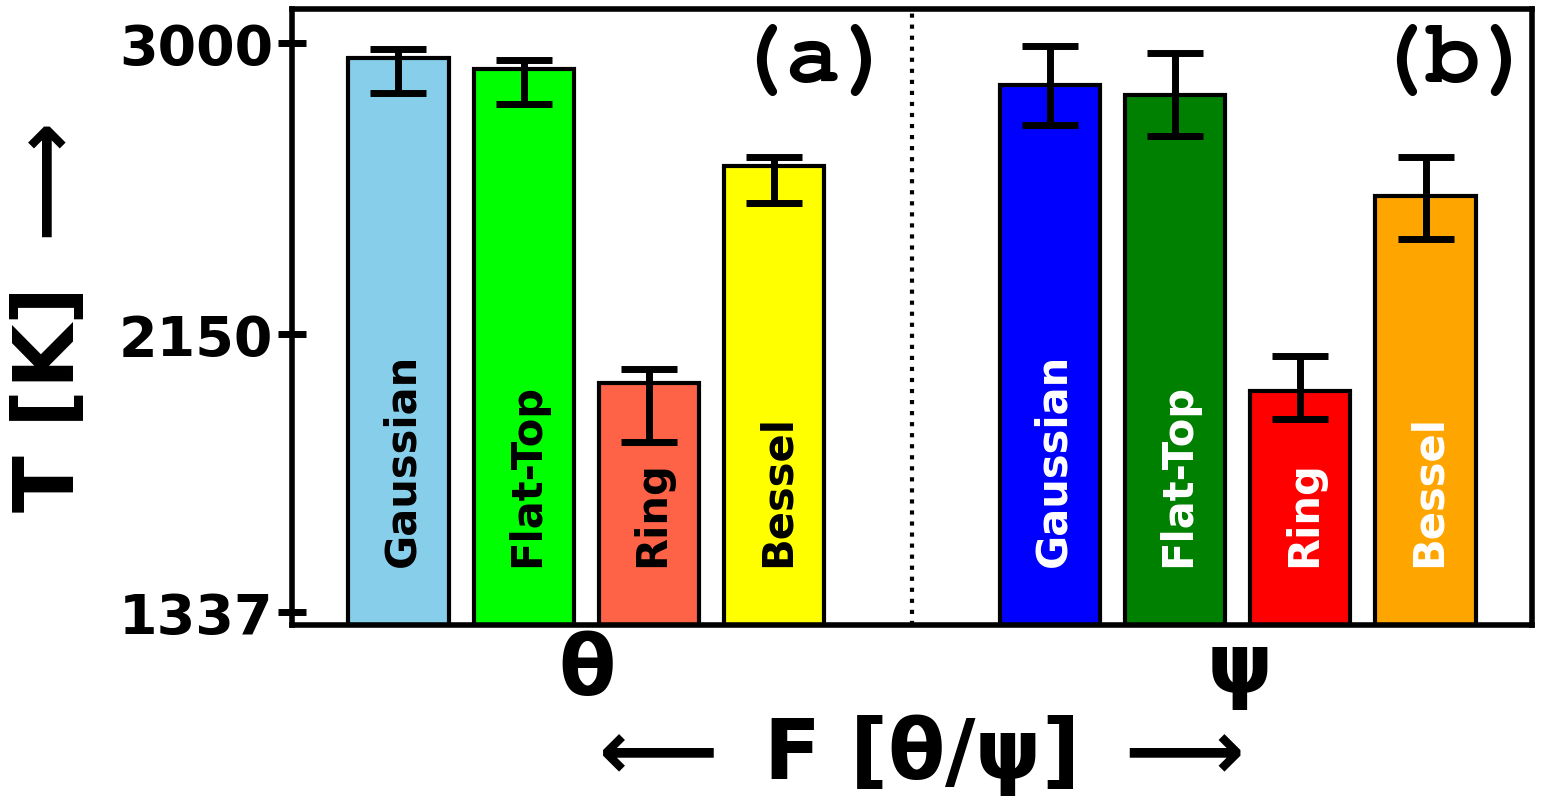

In [8]:
# labels = [r'$\theta$', r'$\theta$', r'$\theta$', r'$\theta$', r'$\mathbf{\psi}$', r'$\mathbf{\psi}$', r'$\mathbf{\psi}$', r'$\mathbf{\psi}$' ]
means = [ G_Fit_temp.mean(), F_Fit_temp.mean(), R_Fit_temp.mean(),  B_Fit_temp.mean(), G_Tdb_temp.mean(), F_Tdb_temp.mean(), R_Tdb_temp.mean(), B_Tdb_temp.mean()]
max_temps = [ G_Fit_temp.max(), F_Fit_temp.max(), R_Fit_temp.max(),  B_Fit_temp.max(), G_Tdb_temp.max(), F_Tdb_temp.max(), R_Tdb_temp.max(), B_Tdb_temp.max()]
min_temps = [ G_Fit_temp.min(), F_Fit_temp.min(), R_Fit_temp.min(),  B_Fit_temp.min(), G_Tdb_temp.min(), F_Tdb_temp.min(), R_Tdb_temp.min(), B_Tdb_temp.min()]

errors = [(max_temps[i] - means[i], means[i] - min_temps[i]) for i in range(len(means))]

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

bar_width = 2  # Width of each bar
gap = 0.5  # Gap between groups

# Position of Center of the Bars
P_GF = 1
P_FF = P_GF + bar_width/2 + gap + bar_width/2
P_RF = P_FF + bar_width/2 + gap + bar_width/2
P_BF = P_RF + bar_width/2 + gap + bar_width/2
P_GT = P_BF + bar_width/2 + 7*gap + bar_width/2
P_FT = P_GT + bar_width/2 + gap + bar_width/2
P_RT = P_FT + bar_width/2 + gap + bar_width/2
P_BT = P_RT + bar_width/2 + gap + bar_width/2


positions = [P_GF, P_FF, P_RF, P_BF, P_GT, P_FT, P_RT, P_BT,]
colors = ['skyblue', 'lime', 'tomato', 'yellow', 'blue', 'green', 'red', 'orange',]

bars = ax1.bar(positions, means, bar_width, yerr=np.array(errors).T, capsize=20, color=colors, linewidth=3, linestyle='-', edgecolor='k', error_kw={ 'elinewidth': 5, 'ecolor':'k', 'capthick':5, }, )

ax1.set_xticks([P_FF+bar_width/2+gap/2, P_FT+bar_width/2+gap/2], labels=[r'$\mathbf{\theta}$', r'$\mathbf{\psi}$'], size=60, color='k', weight='bold')
ax1.tick_params(axis='x', direction='inout', which='both', length=0, width=0)
ax1.tick_params(axis='y', which='both', direction='inout', length=20, width=5)
ax1.set_yticks([1337, 2150, 3000], labels=['1337', '2150', '3000' ], size=40, color='k', weight='bold')
ax1.set_xlabel(r"$\mathbf{\longleftarrow}$ F [$\mathbf{\theta / \psi}$] $\mathbf{\longrightarrow}$", weight = 'bold', size=60, labelpad=0, color='k')
ax1.set_ylabel(r"T [K] $\mathbf{\longrightarrow}$", weight = 'bold', size=60, labelpad=20, color='k')
ax1.set_ylim(1300,3100)

ax1.spines[:].set_linewidth(4)

# text = Text(x=0.2, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
# fig.add_artist(text)
ax1.text(x=P_GF-0.35, y=1500, s='Gaussian', fontsize=30, weight='bold', color='k', rotation=90)
ax1.text(x=P_FF-0.35, y=1500, s='Flat-Top', fontsize=30, weight='bold', color='k', rotation=90)
ax1.text(x=P_RF-0.35, y=1500, s='Ring', fontsize=30, weight='bold', color='k', rotation=90)
ax1.text(x=P_BF-0.35, y=1500, s='Bessel', fontsize=30, weight='bold', color='k', rotation=90)

ax1.text(x=P_GT-0.35, y=1500, s='Gaussian', fontsize=30, weight='bold', color='white', rotation=90)
ax1.text(x=P_FT-0.35, y=1500, s='Flat-Top', fontsize=30, weight='bold', color='white', rotation=90)
ax1.text(x=P_RT-0.35, y=1500, s='Ring', fontsize=30, weight='bold', color='white', rotation=90)
ax1.text(x=P_BT-0.35, y=1500, s='Bessel', fontsize=30, weight='bold', color='white', rotation=90)

ax1.vlines(x=P_BF+bar_width/2+3.5*gap, ymin=1300, ymax=3100, linestyle=':', linewidth=3, color='k')

text_a = Text(x=0.4, y=0.79, text=r'(a)', fontsize=65, color='k', rotation=0, weight='bold', fontname='FreeMono')
text_b = Text(x=0.8, y=0.79, text=r'(b)', fontsize=65, color='k', rotation=0, weight='bold', fontname='FreeMono')
fig.add_artist(text_a)
fig.add_artist(text_b)

# plt.savefig('../../figures/peak_temp_free_energies.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/peak_temp_free_energies.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/peak_temp_free_energies.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/peak_temp_free_energies.jpg',bbox_inches='tight',)

plt.show()

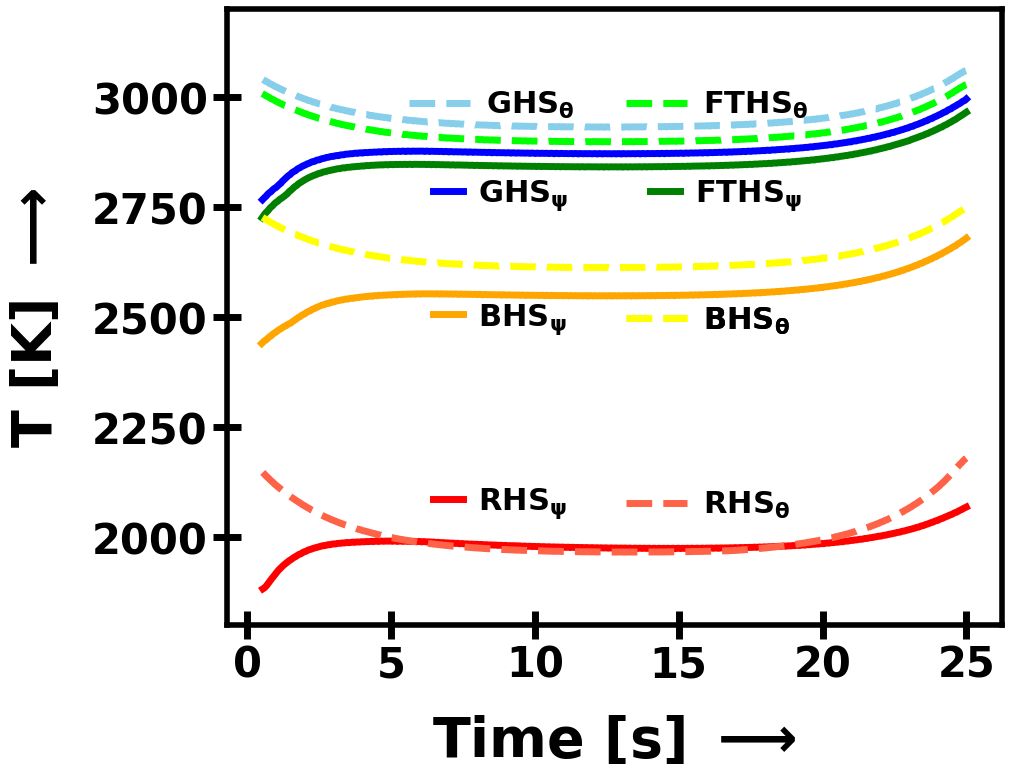

In [9]:
fig, ax1 = plt.subplots(1,1, figsize=(10,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))


GT, = ax1.plot(G_Tdb['time'][36:455], G_Tdb['temp_max'][36:455],   color ='blue',   linewidth=5, linestyle='-',  label=r'GHS$_\mathbf{\psi}$')
GF = ax1.plot(G_Fit['time'][113:522], G_Fit['temp_max'][113:522], color='skyblue', linewidth=5, linestyle='--', label=r'GHS$_\mathbf{\theta}$')
FT = ax1.plot(F_Tdb['time'][45:470], F_Tdb['temp_max'][45:470],   color ='green',  linewidth=5, linestyle='-',  label=r'FTHS$_\mathbf{\psi}$')
FF = ax1.plot(F_Fit['time'][111:520], F_Fit['temp_max'][111:520], color='lime',    linewidth=5, linestyle='--', label=r'FTHS$_\mathbf{\theta}$')
RT = ax1.plot(R_Tdb['time'][9:418], R_Tdb['temp_max'][9:418],     color ='red',    linewidth=5, linestyle='-',  label=r'RHS$_\mathbf{\psi}$')
RF = ax1.plot(R_Fit['time'][96:505], R_Fit['temp_max'][96:505],   color='tomato',  linewidth=5, linestyle='--', label=r'RHS$_\mathbf{\theta}$')
BT = ax1.plot(B_Tdb['time'][49:477], B_Tdb['temp_max'][49:477],   color ='orange', linewidth=5, linestyle='-',  label=r'BHS$_\mathbf{\psi}$')
BF = ax1.plot(B_Fit['time'][99:511], B_Fit['temp_max'][99:511],   color='yellow',  linewidth=5, linestyle='--', label=r'BHS$_\mathbf{\theta}$')

ax1.set_xticks([0, 5, 10, 15, 20, 25], labels=[r'0', r'5', r'10', r'15', r'20', r'25'], size=30, color='k', weight='bold')
ax1.set_yticks([2000, 2250, 2500, 2750, 3000], labels=[r'2000', r'2250', r'2500', r'2750', r'3000'], size=30, color='k', weight='bold')
ax1.tick_params(axis='x', direction='inout', which='both', length=20, width=5)
ax1.tick_params(axis='y', which='both', direction='inout', length=20, width=5)
ax1.set_xlabel(r"Time [s] $\mathbf{\longrightarrow}$", weight = 'bold', size=40, labelpad=20, color='k')
ax1.set_ylabel(r"T [K] $\mathbf{\longrightarrow}$", weight = 'bold', size=40, labelpad=20, color='k')
ax1.set_ylim(1800,3200)


lines   = ax1.get_lines()
GT_ = ax1.legend([lines[0]], [lines[0].get_label()], loc=(0.25,0.65),    prop={'weight':'bold', 'size':'22',},handletextpad=0.5, handlelength=1, frameon=False)
GF_ = ax1.legend([lines[1]], [lines[1].get_label()], loc=(0.22,0.8), prop={'weight':'bold', 'size':'22',}, handletextpad=0.5, handlelength=2, frameon=False)
FT_ = ax1.legend([lines[2]], [lines[2].get_label()], loc=(0.53,0.65),    prop={'weight':'bold', 'size':'22',}, handletextpad=0.5, handlelength=1, frameon=False)
FF_ = ax1.legend([lines[3]], [lines[3].get_label()], loc=(0.50,0.8), prop={'weight':'bold', 'size':'22',}, handletextpad=0.5, handlelength=2, frameon=False)
RT_ = ax1.legend([lines[4]], [lines[4].get_label()], loc=(0.25,0.15),    prop={'weight':'bold', 'size':'22',}, handletextpad=0.5, handlelength=1, frameon=False)
RF_ = ax1.legend([lines[5]], [lines[5].get_label()], loc=(0.50,0.15), prop={'weight':'bold', 'size':'22',}, handletextpad=0.5, handlelength=2, frameon=False)
BT_ = ax1.legend([lines[6]], [lines[6].get_label()], loc=(0.25,0.45),    prop={'weight':'bold', 'size':'22',}, handletextpad=0.5, handlelength=1, frameon=False)
BF_ = ax1.legend([lines[7]], [lines[7].get_label()], loc=(0.50,0.45), prop={'weight':'bold', 'size':'22',}, handletextpad=0.5, handlelength=2, frameon=False)

ax1.add_artist(GT_)
ax1.add_artist(GF_)
ax1.add_artist(FT_)
ax1.add_artist(FF_)
ax1.add_artist(RT_)
ax1.add_artist(RF_)
ax1.add_artist(BT_)
ax1.add_artist(BF_)

ax1.spines[:].set_linewidth(4)

# plt.savefig('../../figures/peak_temp.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/peak_temp.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/peak_temp.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/peak_temp.jpg',bbox_inches='tight',)

plt.show()

# Area of Meltpool

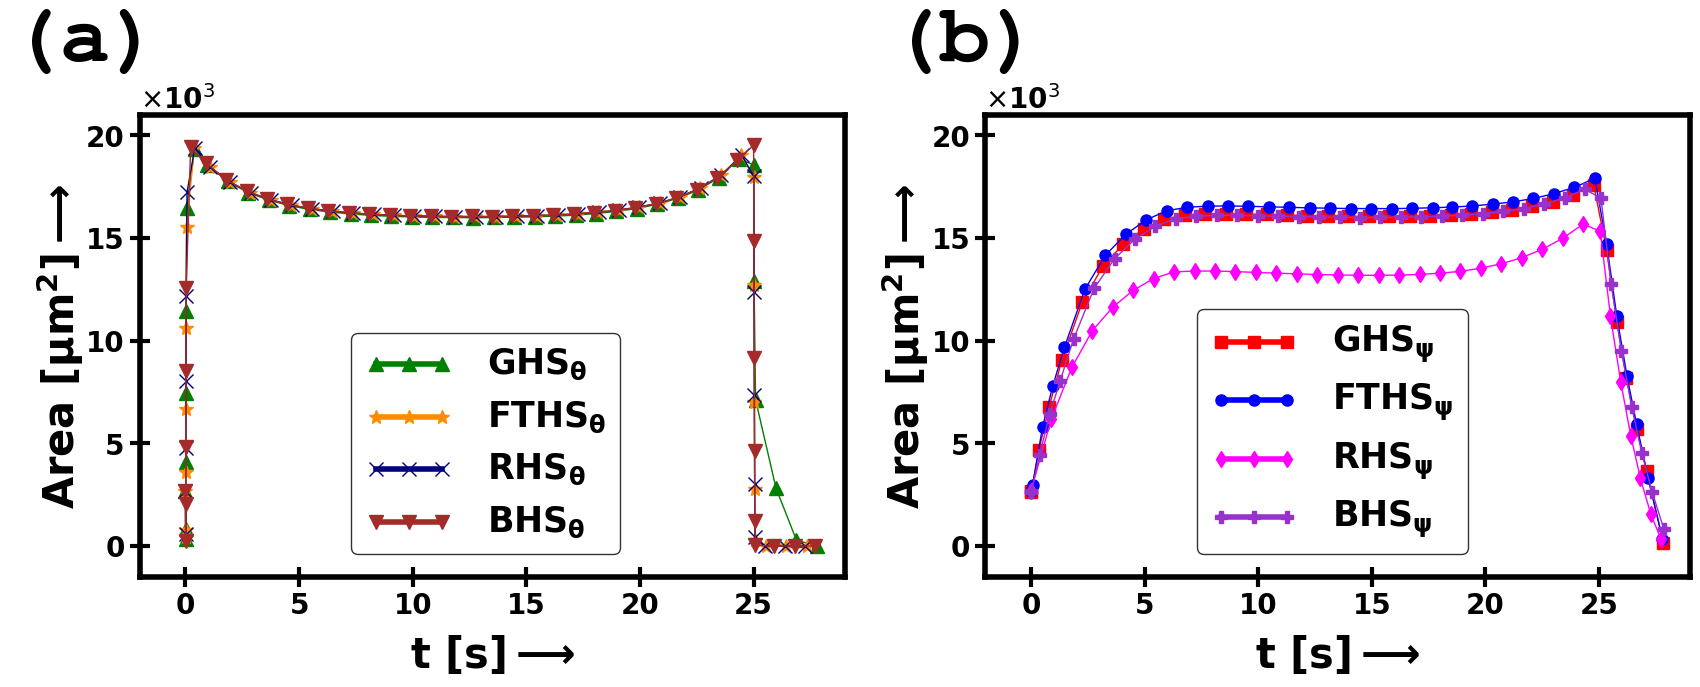

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 6], frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
ax2.set_facecolor((0, 0, 0, 0))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)

GF, = ax1.plot(G_Fit['time'].iloc[::15], G_Fit['area_h1'].iloc[::15], linewidth=1, linestyle='-', color='green',  marker='^', markersize=10, label =r'GHS$\mathbf{_{\theta}}$')
FF, = ax1.plot(F_Fit['time'].iloc[::15], F_Fit['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='*', markersize=10, color='darkorange', label =r'FTHS$\mathbf{_{\theta}}$')
RF, = ax1.plot(R_Fit['time'].iloc[::15], R_Fit['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='x', markersize=10, color='navy', label =r'RHS$\mathbf{_{\theta}}$')
BF, = ax1.plot(B_Fit['time'].iloc[::15], B_Fit['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='v', markersize=10, color='brown', label =r'BHS$\mathbf{_{\theta}}$')

ax1.set_ylabel(r"Area $ \mathbf{ [\mu m^2] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax1.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax1.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax1.set_yticks([0, 5_000, 10_000, 15_000, 20_000, 25_000], labels=['0', '5', '10', '15', '20', '25'], size=20, color='k', weight='bold')
ax1.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=20, weight='bold')
# ax1.set_title(r"F$_\mathbf{\psi}$", fontsize=50, pad=20, weight='bold')
ax1.set_ylim(-1500, 21000)
ax1.set_xlim(-2, 29)
ax1.spines[:].set_linewidth(4)
ax1.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_F = ax1.legend(loc=(0.30, 0.05), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'25',}, 
                      handler_map={GF: HandlerLine2D(numpoints=3), FF: HandlerLine2D(numpoints=3), RF: HandlerLine2D(numpoints=3), BF: HandlerLine2D(numpoints=3),}, 
                      handletextpad=1.0, handlelength=2.5, handleheight=0.25, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(4.0) for line in legend_F.get_lines()]


GT, = ax2.plot(G_Tdb['time'].iloc[::15], G_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', mec='red', mfc='red', color = 'red',  marker='s', markersize=8, label =r'GHS$\mathbf{_{\psi}}$')
FT, = ax2.plot(F_Tdb['time'].iloc[::15], F_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='o', markersize=8, color = 'blue', label =r'FTHS$\mathbf{_{\psi}}$')
RT, = ax2.plot(R_Tdb['time'].iloc[::15], R_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='d', markersize=8, color = 'magenta', label =r'RHS$\mathbf{_{\psi}}$')
BT, = ax2.plot(B_Tdb['time'].iloc[::15], B_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='P', markersize=8, color = 'darkorchid', label =r'BHS$\mathbf{_{\psi}}$')

ax2.set_ylabel(r"Area $ \mathbf{ [\mu m^2] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax2.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax2.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax2.set_yticks([0, 5_000, 10_000, 15_000, 20_000, 25_000], labels=['0', '5', '10', '15', '20', '25'], size=20, color='k', weight='bold')
ax2.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=20, weight='bold')
# ax2.set_title(r"F$_\mathbf{\psi}$", fontsize=50, pad=20, weight='bold')
ax2.set_ylim(-1500, 21000)
ax2.set_xlim(-2, 29)
ax2.spines[:].set_linewidth(4)
ax2.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_T = ax2.legend(loc=(0.30, 0.05), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'25',}, 
                      handler_map={GT: HandlerLine2D(numpoints=3), FT: HandlerLine2D(numpoints=3), RT: HandlerLine2D(numpoints=3), BT: HandlerLine2D(numpoints=3),}, 
                      handletextpad=1.0, handlelength=2.5, handleheight=0.25, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(4.0) for line in legend_T.get_lines()]
# plt.tight_layout()

text_a = Text(x=0.06, y=0.97, text=r'(a)', fontsize=60, color='k', rotation=0, weight='bold', fontname='FreeMono')
text_b = Text(x=0.5, y=0.97, text=r'(b)', fontsize=60, color='k', rotation=0, weight='bold', fontname='FreeMono')
fig.add_artist(text_a)
fig.add_artist(text_b)

# plt.savefig('../../figures/meltpool_area_free_energies.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/meltpool_area_free_energies.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/meltpool_area_free_energies.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/meltpool_area_free_energies.jpg',bbox_inches='tight',)

plt.show()

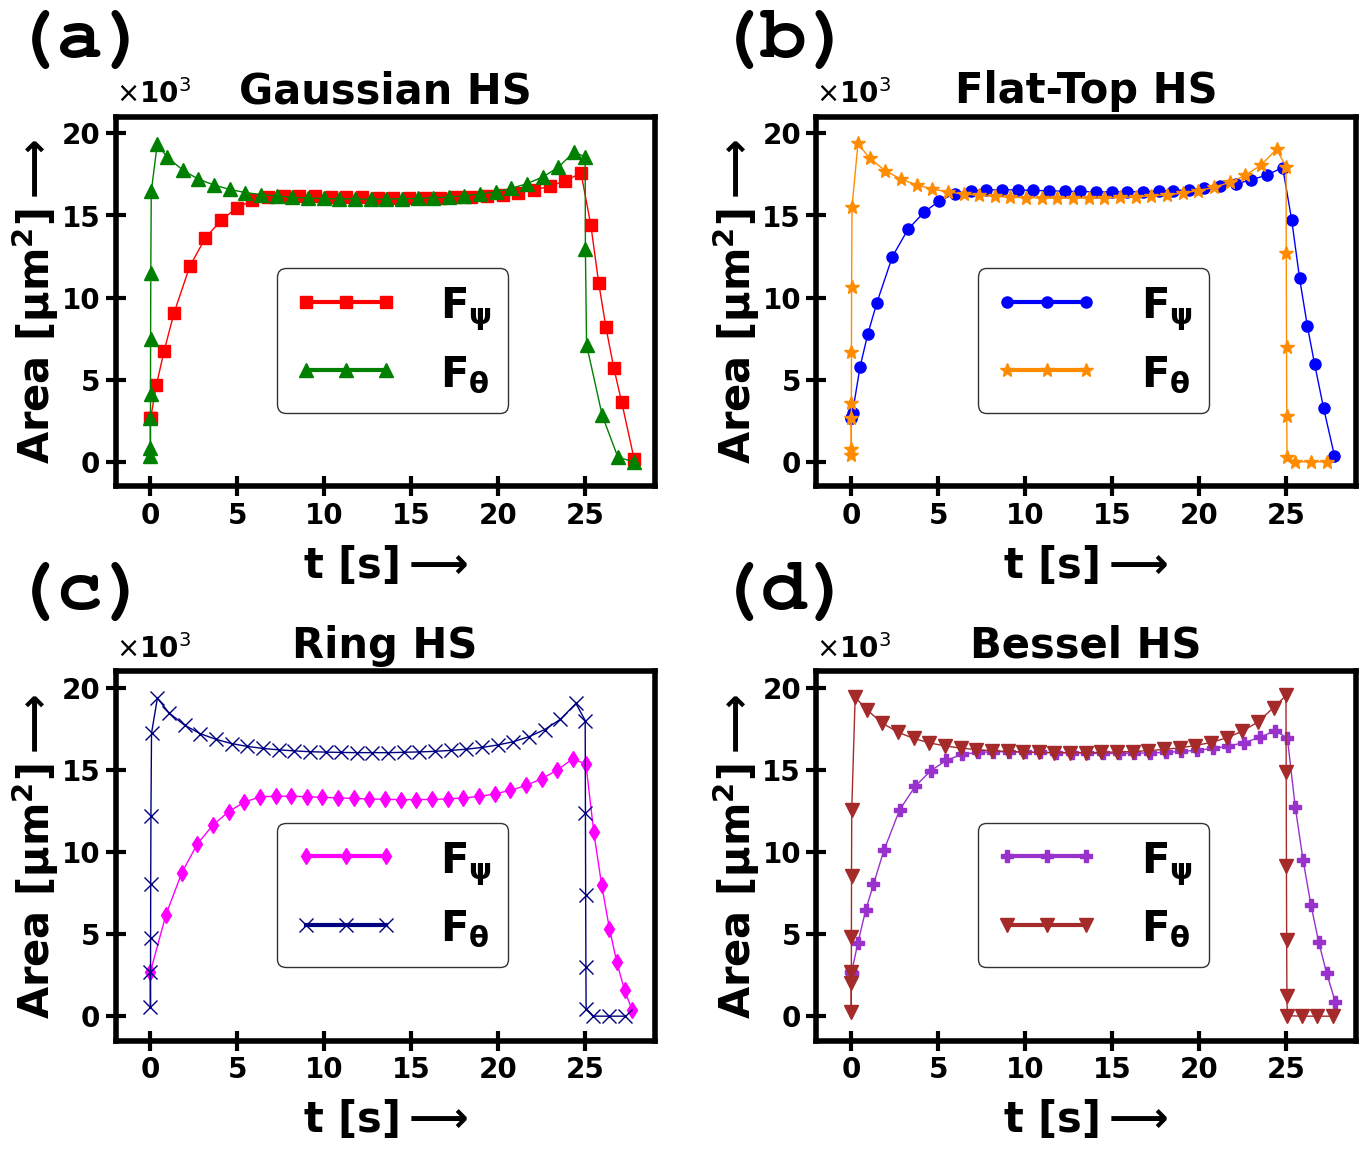

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[16, 12], frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
ax2.set_facecolor((0, 0, 0, 0))
ax3.set_facecolor((0, 0, 0, 0))
ax4.set_facecolor((0, 0, 0, 0))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)

GT, = ax1.plot(G_Tdb['time'].iloc[::15], G_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', mec='red', mfc='red', color = 'red',  marker='s', markersize=8, label =r'F$\mathbf{_{\psi}}$')
GF, = ax1.plot(G_Fit['time'].iloc[::15], G_Fit['area_h1'].iloc[::15], linewidth=1, linestyle='-', color='green',  marker='^', markersize=10, label=r'F$\mathbf{_{\theta}}$')
ax1.set_ylabel(r"Area $ \mathbf{ [\mu m^2] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax1.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax1.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax1.set_yticks([0, 5_000, 10_000, 15_000, 20_000, 25_000], labels=['0', '5', '10', '15', '20', '25'], size=20, color='k', weight='bold')
ax1.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=20, weight='bold')
ax1.set_title("Gaussian HS", fontsize=30, weight='bold', pad=10)
ax1.set_ylim(-1500, 21000)
ax1.set_xlim(-2, 29)
ax1.spines[:].set_linewidth(4)
ax1.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_G = ax1.legend(loc=(0.30, 0.20), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'30',}, handler_map={GT: HandlerLine2D(numpoints=3), GF: HandlerLine2D(numpoints=3)}, handletextpad=1.0, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(3.0) for line in legend_G.get_lines()]


FT, = ax2.plot(F_Tdb['time'].iloc[::15], F_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='o', markersize=8, color = 'blue', label =r'F$\mathbf{_{\psi}}$')
FF, = ax2.plot(F_Fit['time'].iloc[::15], F_Fit['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='*', markersize=10, color='darkorange', label=r'F$\mathbf{_{\theta}}$')
ax2.set_ylabel(r"Area $ \mathbf{ [\mu m^2] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax2.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax2.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax2.set_yticks([0, 5_000, 10_000, 15_000, 20_000, 25_000], labels=['0', '5', '10', '15', '20', '25'], size=20, color='k', weight='bold')
ax2.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=20, weight='bold')
ax2.set_title("Flat-Top HS", fontsize=30, weight='bold', pad=10)
ax2.set_ylim(-1500, 21000)
ax2.set_xlim(-2, 29)
ax2.spines[:].set_linewidth(4)
ax2.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_F = ax2.legend(loc=(0.30, 0.20), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'30',}, handler_map={FT: HandlerLine2D(numpoints=3), FF: HandlerLine2D(numpoints=3)}, handletextpad=1.0, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(3.0) for line in legend_F.get_lines()]


RT, = ax3.plot(R_Tdb['time'].iloc[::15], R_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='d', markersize=8, color = 'magenta', label =r'F$\mathbf{_{\psi}}$')
RF, = ax3.plot(R_Fit['time'].iloc[::15], R_Fit['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='x', markersize=10, color='navy', label=r'F$\mathbf{_{\theta}}$')
ax3.set_ylabel(r"Area $ \mathbf{ [\mu m^2] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax3.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax3.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax3.set_yticks([0, 5_000, 10_000, 15_000, 20_000, 25_000], labels=['0', '5', '10', '15', '20', '25'], size=20, color='k', weight='bold')
ax3.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=20, weight='bold')
ax3.set_title("Ring HS", fontsize=30, weight='bold', pad=10)
ax3.set_ylim(-1500, 21000)
ax3.set_xlim(-2, 29)
ax3.spines[:].set_linewidth(4)
ax3.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_R = ax3.legend(loc=(0.30, 0.20), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'30',}, handler_map={RT: HandlerLine2D(numpoints=3), RF: HandlerLine2D(numpoints=3)}, handletextpad=1.0, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(3.0) for line in legend_R.get_lines()]


BT, = ax4.plot(B_Tdb['time'].iloc[::15], B_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='P', markersize=8, color = 'darkorchid', label =r'F$\mathbf{_{\psi}}$')
BF, = ax4.plot(B_Fit['time'].iloc[::15], B_Fit['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='v', markersize=10, color='brown', label=r'F$\mathbf{_{\theta}}$')
ax4.set_ylabel(r"Area $ \mathbf{ [\mu m^2] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax4.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax4.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax4.set_yticks([0, 5_000, 10_000, 15_000, 20_000, 25_000], labels=['0', '5', '10', '15', '20', '25'], size=20, color='k', weight='bold')
ax4.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=20, weight='bold')
ax4.set_title("Bessel HS", fontsize=30, weight='bold', pad=10)
ax4.set_ylim(-1500, 21000)
ax4.set_xlim(-2, 29)
ax4.spines[:].set_linewidth(4)
ax4.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_B = ax4.legend(loc=(0.30, 0.20), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'30',}, handler_map={BT: HandlerLine2D(numpoints=3), BF: HandlerLine2D(numpoints=3)}, handletextpad=1.0, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(3.0) for line in legend_B.get_lines()]

text_a = Text(x=0.06, y=0.93, text=r'(a)', fontsize=55, color='k', rotation=0, weight='bold', fontname='FreeMono')
text_b = Text(x=0.5, y=0.93, text=r'(b)', fontsize=55, color='k', rotation=0, weight='bold', fontname='FreeMono')
text_c = Text(x=0.06, y=0.47, text=r'(c)', fontsize=55, color='k', rotation=0, weight='bold', fontname='FreeMono')
text_d = Text(x=0.5, y=0.47, text=r'(d)', fontsize=55, color='k', rotation=0, weight='bold', fontname='FreeMono')

fig.add_artist(text_a)
fig.add_artist(text_b)
fig.add_artist(text_c)
fig.add_artist(text_d)

# plt.savefig('../../figures/meltpool_area_heat_sources.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/meltpool_area_heat_sources.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/meltpool_area_heat_sources.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/meltpool_area_heat_sources.jpg',bbox_inches='tight',)

plt.show()